In [1]:
from utils import *
sns.set(style="darkgrid")

In [2]:
set_seed(0)

Random seed set as 0


# Data pre-processing and feature engineering

Reading data using pandas

In [3]:
data = Table.read('./table-4LAC-DR3-h.fits') 
df = data.to_pandas()
df

,Source_Name,DataRelease,RAJ2000,DEJ2000,GLON,GLAT,Signif_Avg,Flux1000,Unc_Flux1000,Energy_Flux100,...,HE_EPeak,Unc_HE_EPeak,HE_nuFnuPeak,Unc_HE_nuFnuPeak,nu_syn,nuFnu_syn,Variability_Index,Frac_Variability,Unc_Frac_Variability,Highest_energy
0,b'4FGL J0001.2+4741',1,0.312600,47.685902,114.250198,-14.338059,4.692600,1.259796e-10,2.877197e-11,1.499454e-12,...,NaN,NaN,-inf,-inf,1.000000e+14,3.716456e-13,25.313953,0.675882,0.312850,65.575203
1,b'4FGL J0001.2-0747',1,0.315100,-7.797100,89.032722,-67.305008,23.782486,7.471219e-10,5.041939e-11,8.339171e-12,...,796.297852,7.667974e+02,8.686245e-07,7.492923e-08,9.120108e+13,1.936770e-12,46.780693,0.406565,0.111870,86.975197
2,b'4FGL J0001.4-0010',3,0.371700,-0.169900,96.891991,-60.491329,4.900018,1.082246e-10,2.914440e-11,1.231385e-12,...,15475.512695,1.847171e+04,1.494930e-07,8.294155e-08,3.609939e+12,2.473256e-13,9.272764,0.000000,10.000000,30.056200
3,b'4FGL J0001.5+2113',1,0.381500,21.218300,107.649353,-40.167652,54.653084,1.347354e-09,6.172809e-11,2.555889e-11,...,65.680008,1.891574e+01,8.844835e-06,8.229393e-07,1.584893e+14,1.152471e-12,1910.935791,0.996138,0.213478,-inf
4,b'4FGL J0001.6-4156',1,0.416500,-41.942501,334.226349,-72.028549,15.724365,2.821817e-10,3.090882e-11,3.560475e-12,...,33178.437500,4.427436e+04,4.817691e-07,1.058807e-07,7.328246e+15,1.902948e-12,26.393343,0.490977,0.175782,266.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3402,b'4FGL J2359.3+0215',2,359.832886,2.260300,97.749023,-58.040924,7.768490,1.354202e-10,3.092540e-11,1.165474e-12,...,7605.735352,2.289568e+03,2.803062e-07,6.769344e-08,1.445440e+13,2.367767e-13,16.065315,0.311971,0.625833,-inf
3403,b'4FGL J2359.3-2049',1,359.835693,-20.818899,58.090145,-76.542862,15.950886,3.462985e-10,3.494565e-11,3.883922e-12,...,348031.937500,3.374152e+07,3.648867e-07,2.767993e-07,3.108136e+12,4.424090e-13,14.043210,0.177217,0.190973,64.177002
3404,b'4FGL J2359.7-5041',3,359.936493,-50.685299,322.128052,-64.472755,4.763167,8.286240e-11,2.406248e-11,8.187322e-13,...,560.015869,2.134525e+02,2.512323e-07,6.735488e-08,5.308849e+12,6.386707e-13,7.732565,0.000000,10.000000,-inf
3405,b'4FGL J2359.9-3736',1,359.981598,-37.616001,345.662842,-74.919624,9.711958,1.915395e-10,2.659639e-11,2.139277e-12,...,1681.698242,1.023358e+03,2.402810e-07,3.849099e-08,5.956622e+12,2.427353e-13,8.143241,0.000000,10.000000,-inf


Unknown data will consist of rows where redshift is not known

In [4]:
unknown_df = df[df['Redshift'].isin([np.inf, -np.inf, np.nan,0])]
unknown_df

,Source_Name,DataRelease,RAJ2000,DEJ2000,GLON,GLAT,Signif_Avg,Flux1000,Unc_Flux1000,Energy_Flux100,...,HE_EPeak,Unc_HE_EPeak,HE_nuFnuPeak,Unc_HE_nuFnuPeak,nu_syn,nuFnu_syn,Variability_Index,Frac_Variability,Unc_Frac_Variability,Highest_energy
0,b'4FGL J0001.2+4741',1,0.312600,47.685902,114.250198,-14.338059,4.692600,1.259796e-10,2.877197e-11,1.499454e-12,...,NaN,NaN,-inf,-inf,1.000000e+14,3.716456e-13,25.313953,0.675882,0.312850,65.575203
1,b'4FGL J0001.2-0747',1,0.315100,-7.797100,89.032722,-67.305008,23.782486,7.471219e-10,5.041939e-11,8.339171e-12,...,796.297852,766.797424,8.686245e-07,7.492923e-08,9.120108e+13,1.936770e-12,46.780693,0.406565,0.111870,86.975197
4,b'4FGL J0001.6-4156',1,0.416500,-41.942501,334.226349,-72.028549,15.724365,2.821817e-10,3.090882e-11,3.560475e-12,...,33178.437500,44274.355469,4.817691e-07,1.058807e-07,7.328246e+15,1.902948e-12,26.393343,0.490977,0.175782,266.625000
5,b'4FGL J0001.8-2153',3,0.464700,-21.886499,55.184696,-77.572540,4.578068,9.047530e-11,2.442527e-11,1.061114e-12,...,6281.065430,2626.445068,1.545364e-07,5.278574e-08,1.659588e+13,9.716011e-13,24.557972,0.902851,0.380107,-inf
6,b'4FGL J0002.1-6728',1,0.537800,-67.474602,310.084930,-48.963467,15.477391,2.588808e-10,3.210022e-11,2.389819e-12,...,9325.473633,3357.712158,3.938158e-07,6.148924e-08,0.000000e+00,0.000000e+00,12.530725,0.174254,0.236286,52.151798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3400,b'4FGL J2359.1+1719',1,359.775604,17.322500,105.517410,-43.772465,6.368470,1.429159e-10,2.833318e-11,1.594102e-12,...,2549.412109,2394.651367,1.711041e-07,4.146840e-08,1.640590e+14,3.639209e-13,10.333145,0.000000,10.000000,39.849499
3402,b'4FGL J2359.3+0215',2,359.832886,2.260300,97.749023,-58.040924,7.768490,1.354202e-10,3.092540e-11,1.165474e-12,...,7605.735352,2289.568359,2.803062e-07,6.769344e-08,1.445440e+13,2.367767e-13,16.065315,0.311971,0.625833,-inf
3404,b'4FGL J2359.7-5041',3,359.936493,-50.685299,322.128052,-64.472755,4.763167,8.286240e-11,2.406248e-11,8.187322e-13,...,560.015869,213.452499,2.512323e-07,6.735488e-08,5.308849e+12,6.386707e-13,7.732565,0.000000,10.000000,-inf
3405,b'4FGL J2359.9-3736',1,359.981598,-37.616001,345.662842,-74.919624,9.711958,1.915395e-10,2.659639e-11,2.139277e-12,...,1681.698242,1023.358276,2.402810e-07,3.849099e-08,5.956622e+12,2.427353e-13,8.143241,0.000000,10.000000,-inf


Removing rows where "Redshift" value is not known for train, val, test sets

In [5]:
df = df[~df['Redshift'].isin([np.inf, -np.inf, np.nan,0])]
df

,Source_Name,DataRelease,RAJ2000,DEJ2000,GLON,GLAT,Signif_Avg,Flux1000,Unc_Flux1000,Energy_Flux100,...,HE_EPeak,Unc_HE_EPeak,HE_nuFnuPeak,Unc_HE_nuFnuPeak,nu_syn,nuFnu_syn,Variability_Index,Frac_Variability,Unc_Frac_Variability,Highest_energy
2,b'4FGL J0001.4-0010',3,0.371700,-0.169900,96.891991,-60.491329,4.900018,1.082246e-10,2.914440e-11,1.231385e-12,...,1.547551e+04,1.847171e+04,1.494930e-07,8.294155e-08,3.609939e+12,2.473256e-13,9.272764,0.000000,10.000000,30.056200
3,b'4FGL J0001.5+2113',1,0.381500,21.218300,107.649353,-40.167652,54.653084,1.347354e-09,6.172809e-11,2.555889e-11,...,6.568001e+01,1.891574e+01,8.844835e-06,8.229393e-07,1.584893e+14,1.152471e-12,1910.935791,0.996138,0.213478,-inf
10,b'4FGL J0003.2+2207',1,0.805800,22.130199,108.438545,-39.380795,5.148481,9.928427e-11,3.024732e-11,6.386718e-13,...,4.823089e+03,1.179400e+03,2.249163e-07,-inf,8.317638e+13,4.518403e-13,12.451856,0.000000,10.000000,-inf
14,b'4FGL J0003.9-1149',1,0.998600,-11.825100,84.595421,-71.075104,12.557568,3.312604e-10,4.011192e-11,2.365501e-12,...,1.329579e+03,4.885237e+02,3.953857e-07,5.257258e-08,2.454709e+12,8.173593e-13,7.357996,0.000000,10.000000,11.008300
15,b'4FGL J0004.0+0840',1,1.007300,8.675700,103.495979,-52.397846,7.296362,1.772500e-10,3.760097e-11,1.151459e-12,...,4.611814e+03,1.349472e+03,2.688350e-07,6.372601e-08,3.019952e+14,2.593057e-13,15.305800,0.357872,0.496670,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397,b'4FGL J2358.5-1808',1,359.638702,-18.140800,66.593277,-74.863571,23.061802,5.777591e-10,4.674376e-11,5.627265e-12,...,1.022363e+04,5.365790e+03,7.257854e-07,8.739315e-08,2.243882e+15,1.759677e-12,22.734268,0.257045,0.119258,73.833504
3398,b'4FGL J2359.0+3922',1,359.754791,39.366901,112.003799,-22.389944,10.998774,3.276193e-10,3.795829e-11,4.408827e-12,...,2.953565e+01,1.241425e+02,9.691414e-07,8.659123e-07,4.518559e+12,1.276536e-12,56.146664,0.779921,0.203910,11.807500
3399,b'4FGL J2359.0-3038',1,359.771912,-30.636700,12.809109,-78.024170,21.459154,4.498665e-10,3.936661e-11,5.462747e-12,...,8.157756e+06,1.524096e+08,1.017424e-06,1.651277e-06,1.972423e+17,1.342929e-11,11.357653,0.057873,0.346387,268.498993
3401,b'4FGL J2359.2-3134',2,359.816711,-31.583200,8.411576,-77.800972,9.351609,1.707287e-10,2.729282e-11,3.041825e-12,...,NaN,NaN,-inf,-inf,1.644372e+12,4.167110e-13,82.691574,1.012355,0.248552,-inf


Choosing the requisite features for the study

In [6]:
selected_columns = ['nuFnu_syn', 'nu_syn', 'CLASS', 'SED_class', 'GLON', 'LP_beta', 'GLAT', 'Frac_Variability',
                    'Pivot_Energy', 'Highest_energy', 'PL_Index', 'SpectrumType', 'Unc_Frac_Variability',
                    'LP_Index', 'Unc_Energy_Flux100', 'Unc_Flux1000', 'Variability_Index', 'Flux1000',
                    'Unc_LP_Index', 'Energy_Flux100', 'Signif_Avg', 'Unc_PL_Index', 'Unc_LP_beta', 'Flags',
                    'Redshift']
df = df[selected_columns]

Defining relevant columns

In [7]:
categorical_features = ['SpectrumType', 'Flags', 'CLASS', 'SED_class']
label = 'Redshift'
numeric_features = list(set(selected_columns)-set(categorical_features))
numeric_features.remove(label)
sorted(numeric_features)

['Energy_Flux100',
 'Flux1000',
 'Frac_Variability',
 'GLAT',
 'GLON',
 'Highest_energy',
 'LP_Index',
 'LP_beta',
 'PL_Index',
 'Pivot_Energy',
 'Signif_Avg',
 'Unc_Energy_Flux100',
 'Unc_Flux1000',
 'Unc_Frac_Variability',
 'Unc_LP_Index',
 'Unc_LP_beta',
 'Unc_PL_Index',
 'Variability_Index',
 'nuFnu_syn',
 'nu_syn']

In [8]:
unknown_df_cols = numeric_features+categorical_features
unknown_df = unknown_df[unknown_df_cols]
unknown_df

,GLON,Unc_LP_beta,PL_Index,LP_beta,Unc_Frac_Variability,LP_Index,Flux1000,Unc_Flux1000,Pivot_Energy,Variability_Index,...,Unc_PL_Index,Highest_energy,Energy_Flux100,Unc_Energy_Flux100,nu_syn,nuFnu_syn,SpectrumType,Flags,CLASS,SED_class
0,114.250198,0.108880,2.271696,0.012156,0.312850,2.254081,1.259796e-10,2.877197e-11,2420.575195,25.313953,...,0.179057,65.575203,1.499454e-12,3.968492e-13,1.000000e+14,3.716456e-13,b'PowerLaw',0,b'bcu',b'ISP'
1,89.032722,0.033735,2.116692,0.051182,0.111870,2.078927,7.471219e-10,5.041939e-11,1721.603882,46.780693,...,0.049792,86.975197,8.339171e-12,5.499455e-13,9.120108e+13,1.936770e-12,b'PowerLaw',0,b'bll',b'LSP'
4,334.226349,0.053936,1.775175,0.072754,0.175782,1.693865,2.821817e-10,3.090882e-11,4047.030029,26.393343,...,0.073320,266.625000,3.560475e-12,4.168776e-13,7.328246e+15,1.902948e-12,b'PowerLaw',2,b'bcu',b'HSP'
5,55.184696,0.297014,1.876663,0.405808,0.380107,1.716620,9.047530e-11,2.442527e-11,4429.934082,24.557972,...,0.172112,-inf,1.061114e-12,2.768216e-13,1.659588e+13,9.716011e-13,b'PowerLaw',0,b'bcu',b'LSP'
6,310.084930,0.077950,1.847773,0.186790,0.236286,1.593436,2.588808e-10,3.210022e-11,3140.743408,12.530725,...,0.075914,52.151798,2.389819e-12,3.495117e-13,0.000000e+00,0.000000e+00,b'LogParabola',0,b'bll',NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3400,105.517410,0.130419,2.112676,0.116845,10.000000,1.995322,1.429159e-10,2.833318e-11,2498.890869,10.333145,...,0.144018,39.849499,1.594102e-12,3.195270e-13,1.640590e+14,3.639209e-13,b'PowerLaw',0,b'bcu',b'ISP'
3402,97.749023,0.191535,1.757034,0.460086,0.625833,1.644894,1.354202e-10,3.092540e-11,5170.603516,16.065315,...,0.118792,-inf,1.165474e-12,2.704718e-13,1.445440e+13,2.367767e-13,b'LogParabola',0,b'bcu',b'LSP'
3404,322.128052,0.464405,2.684101,0.731089,10.000000,2.596392,8.286240e-11,2.406248e-11,842.054199,7.732565,...,0.160861,-inf,8.187322e-13,2.772015e-13,5.308849e+12,6.386707e-13,b'LogParabola',0,b'bcu',b'LSP'
3405,345.662842,0.092144,2.120209,0.127121,10.000000,2.007299,1.915395e-10,2.659639e-11,1730.675415,8.143241,...,0.099106,-inf,2.139277e-12,2.907011e-13,5.956622e+12,2.427353e-13,b'PowerLaw',0,b'bcu',b'LSP'


Get information abour missing/indeterminate values present in the feature columns and handle them

In [9]:
get_indeterminate_column_info(df = df)

SED_class has 266 null values
Highest_energy has 582 indeterminate values
Unc_LP_beta has 12 null values


In [10]:
get_indeterminate_column_info(df = unknown_df)

Unc_LP_beta has 27 null values
Highest_energy has 704 indeterminate values
SED_class has 511 null values


Check the distributions of both 'SED_class' and 'Highest_energy' columns for both known and unknown redhsift samples

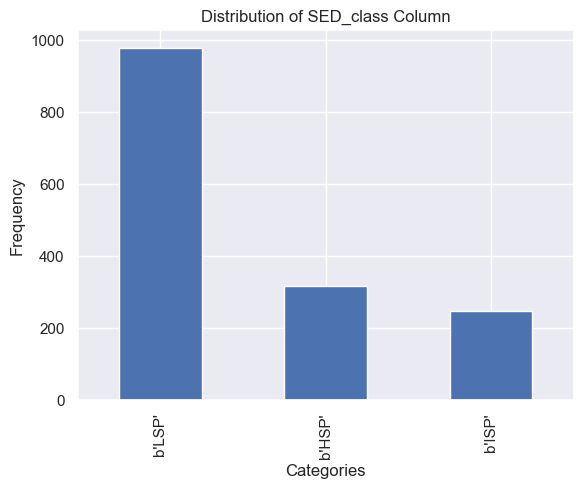

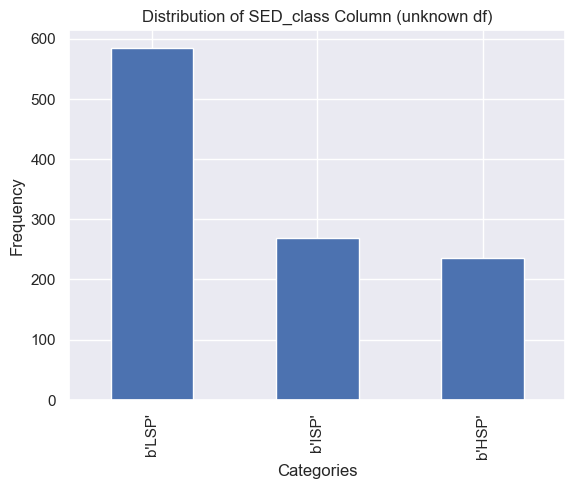

In [11]:
filtered_df = df[df['SED_class'].notnull()]
column_series = filtered_df['SED_class']
category_counts = column_series.value_counts()

category_counts.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Distribution of SED_class Column')
plt.show()


filtered_unknown_df = unknown_df[unknown_df['SED_class'].notnull()]
column_series = filtered_unknown_df['SED_class']
category_counts = column_series.value_counts()

category_counts.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Distribution of SED_class Column (unknown df)')
plt.show()

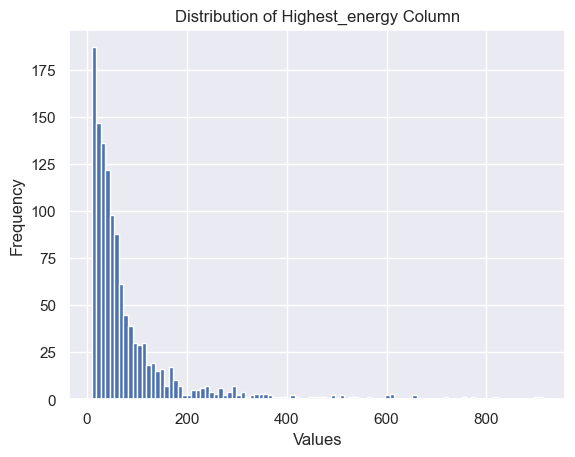

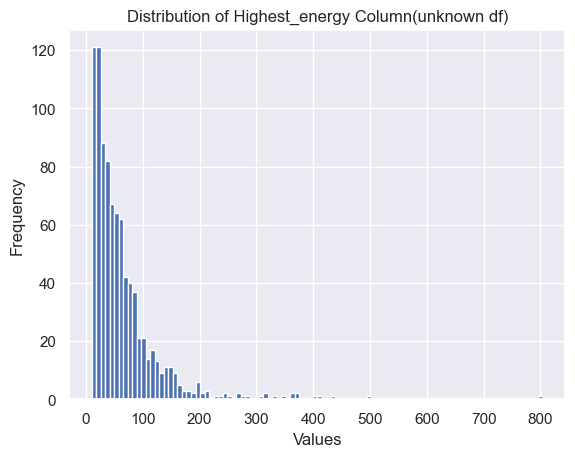

In [12]:
filtered_df = df[~df['Highest_energy'].isin([np.inf, -np.inf, np.nan,0])]
column_series = filtered_df['Highest_energy']
plt.hist(column_series, bins=100)  # Adjust the number of bins as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Highest_energy Column')
plt.show()

filtered_unknown_df = unknown_df[~unknown_df['Highest_energy'].isin([np.inf, -np.inf, np.nan,0])]
column_series = filtered_unknown_df['Highest_energy']
plt.hist(column_series, bins=100)  # Adjust the number of bins as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Highest_energy Column(unknown df)')
plt.show()

Drop null-valued and indeterminate rows for 'Unc_LP_Beta' and 'Highest_energy' features, respectively, and impute the values for 'SED_class' using the most frequent value of the feature

In [13]:
df.dropna(subset=['Unc_LP_beta'], inplace=True)
df = df[~df['Highest_energy'].isin([np.inf, -np.inf, np.nan,0])]
imputer = SimpleImputer(strategy='most_frequent')
df['SED_class'] = imputer.fit_transform(df[['SED_class']])

unknown_df.dropna(subset=['Unc_LP_beta'], inplace=True)
unknown_df = unknown_df[~unknown_df['Highest_energy'].isin([np.inf, -np.inf, np.nan,0])]
imputer = SimpleImputer(strategy='most_frequent')
unknown_df['SED_class'] = imputer.fit_transform(unknown_df[['SED_class']])

Plotting the distributions for the features again

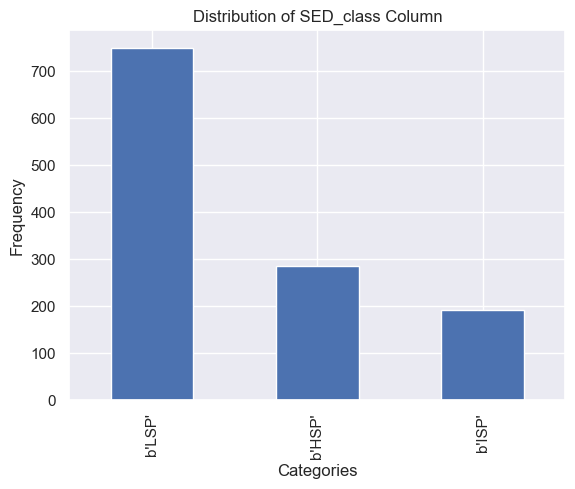

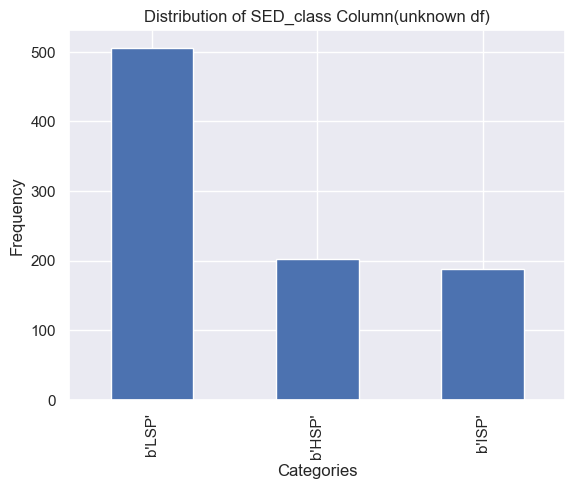

In [14]:
column_series = df['SED_class']
category_counts = column_series.value_counts()

category_counts.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Distribution of SED_class Column')
plt.show()

column_series = unknown_df['SED_class']
category_counts = column_series.value_counts()

category_counts.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Distribution of SED_class Column(unknown df)')
plt.show()

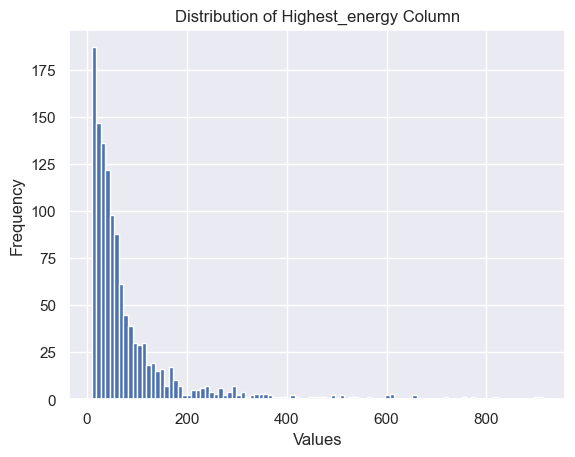

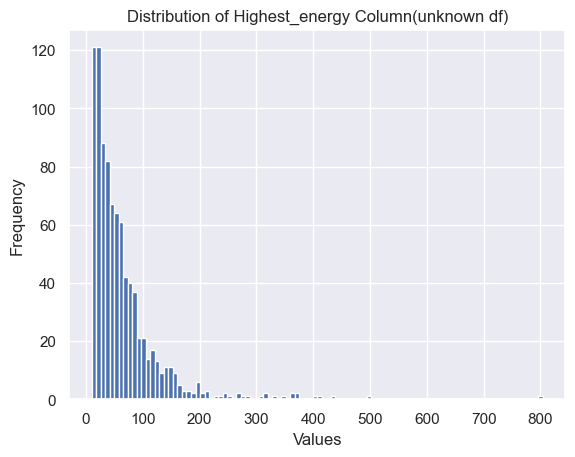

In [15]:
column_series = df['Highest_energy']
plt.hist(column_series, bins=100)  # Adjust the number of bins as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Highest_energy Column')
plt.show()

column_series = unknown_df['Highest_energy']
plt.hist(column_series, bins=100)  # Adjust the number of bins as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Highest_energy Column(unknown df)')
plt.show()

In [16]:
get_indeterminate_column_info(df = df)
get_indeterminate_column_info(df = unknown_df)

All null/indeterminate values handled
All null/indeterminate values handled


In [17]:
df.shape

(1224, 25)

In [18]:
unknown_df.shape

(896, 24)

Feature transformations:

Energy_Flux100

Text(0.5, 1.0, 'Distribution of Energy_Flux100')

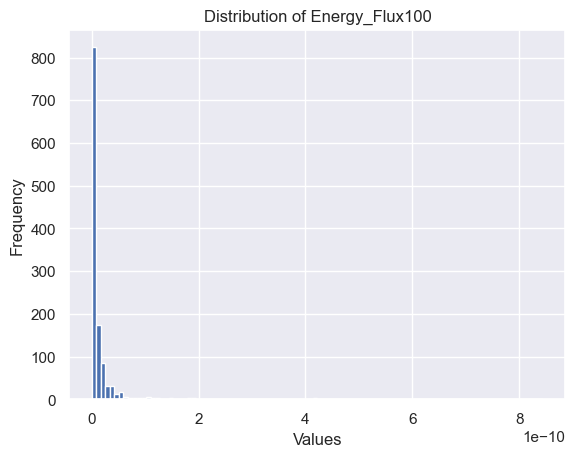

In [19]:
column = 'Energy_Flux100'
plt.hist(df[column], bins = 100)
plt.ylabel('Frequency')
plt.xlabel('Values')
plt.title(f'Distribution of {column}')

Text(0.5, 1.0, 'Distribution of Energy_Flux100 for unknown df')

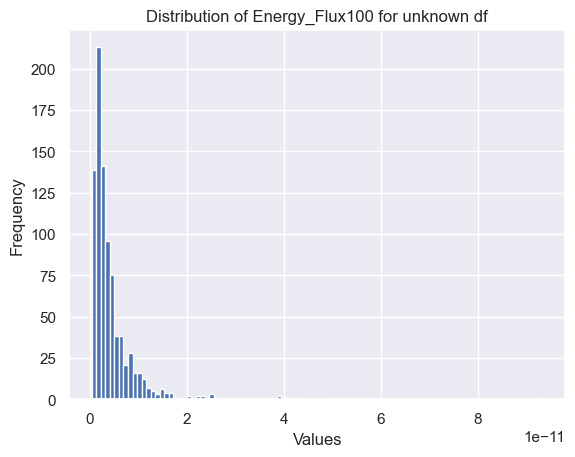

In [20]:
plt.hist(unknown_df[column], bins = 100)
plt.ylabel('Frequency')
plt.xlabel('Values')
plt.title(f'Distribution of {column} for unknown df')

In [21]:
def plot_column_distribution(column = None, df = None, transformed = False):
    plt.hist(df[column], bins = 100)
    plt.ylabel('Frequency')
    plt.xlabel('Values')
    if transformed == False:
        plt.title(f'Distribution of {column}')
    else:
        plt.title(f'Distribution of {column} after transformation')
    plt.show()

def plot_categorical_column_dsitribution(column = None , df = None):
    column_series = df[column]
    category_counts = column_series.value_counts()

    category_counts.plot(kind='bar')
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column} Column')
    plt.show()
    

All feature plots:

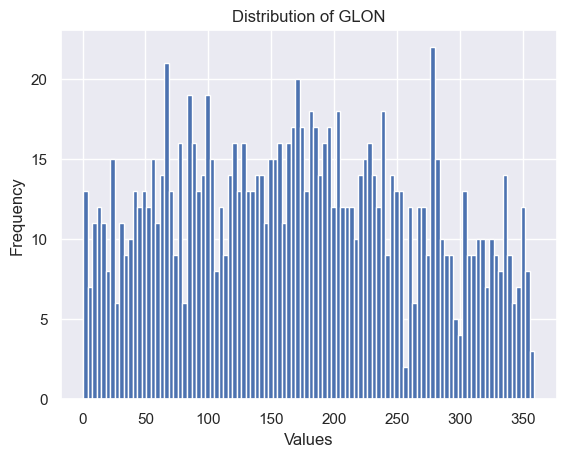

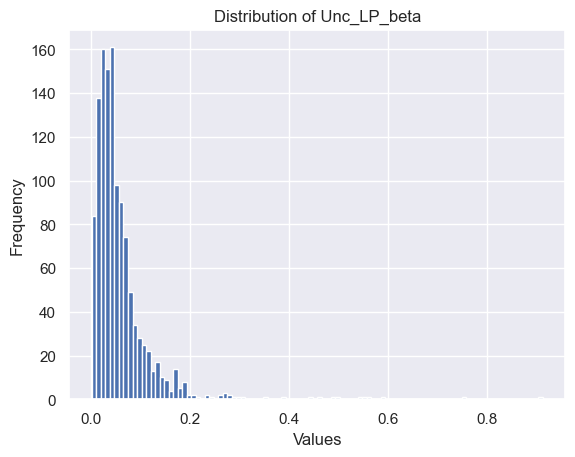

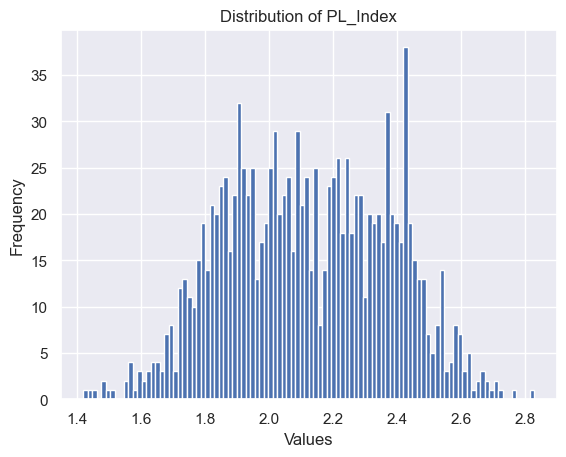

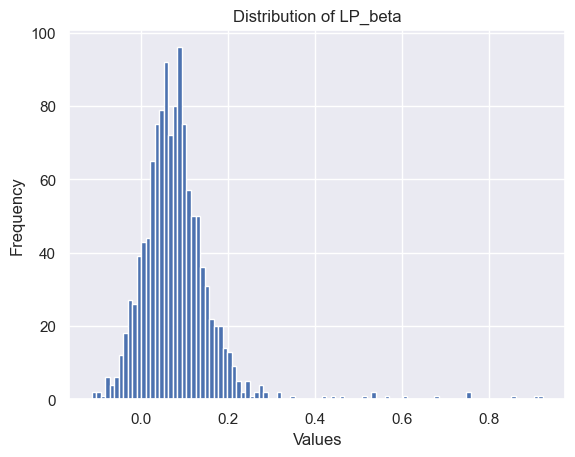

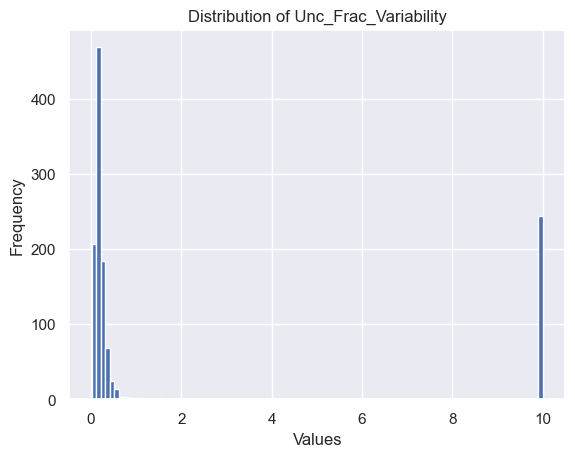

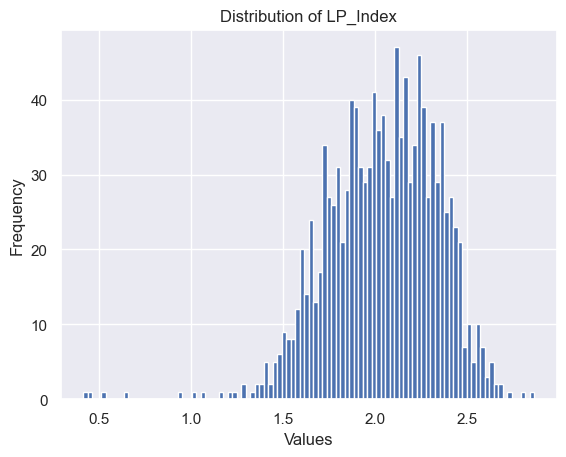

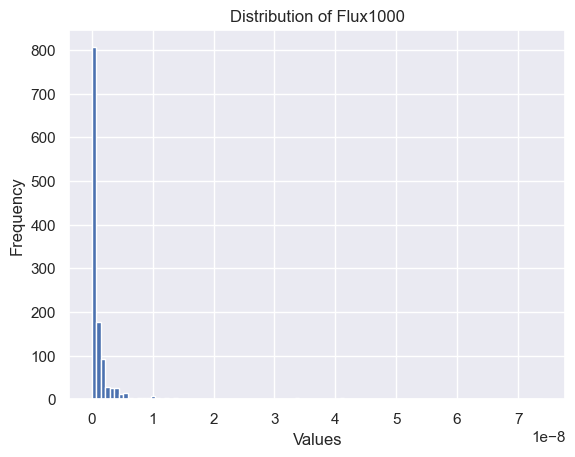

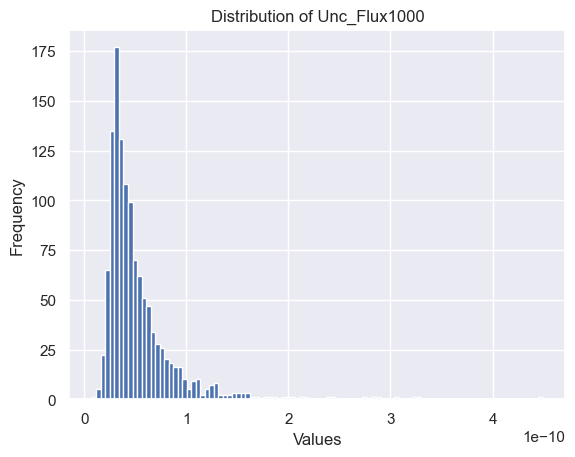

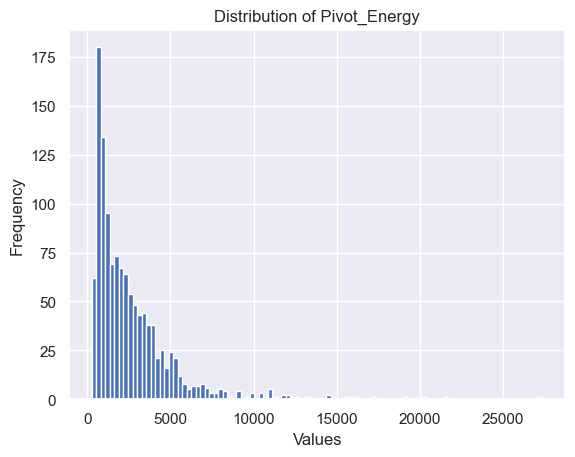

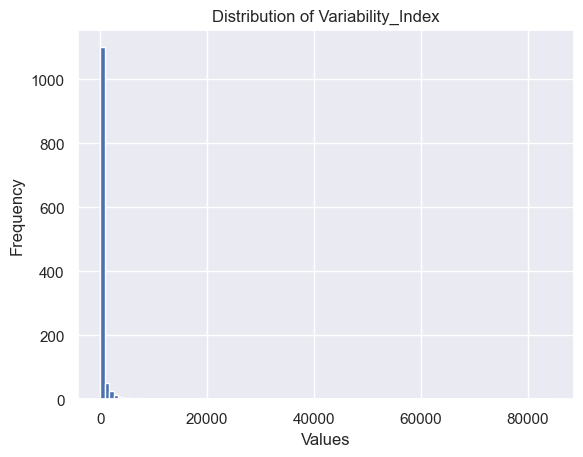

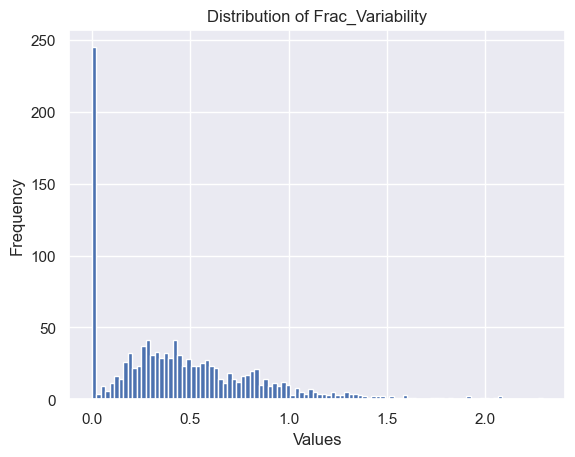

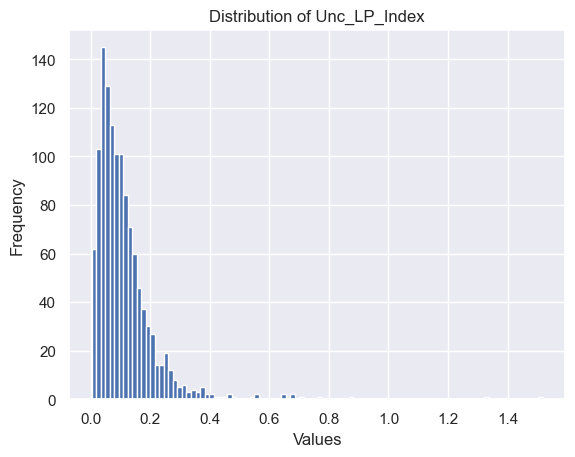

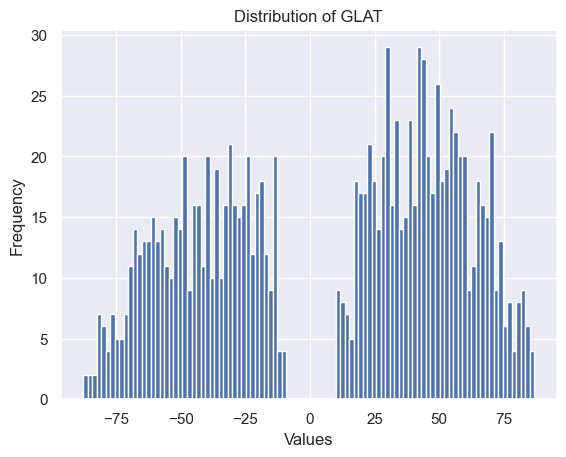

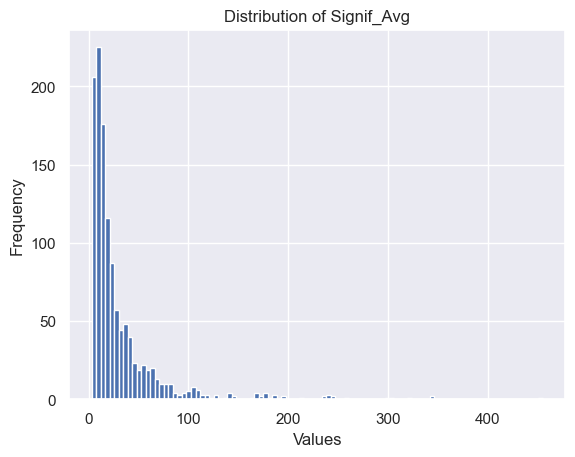

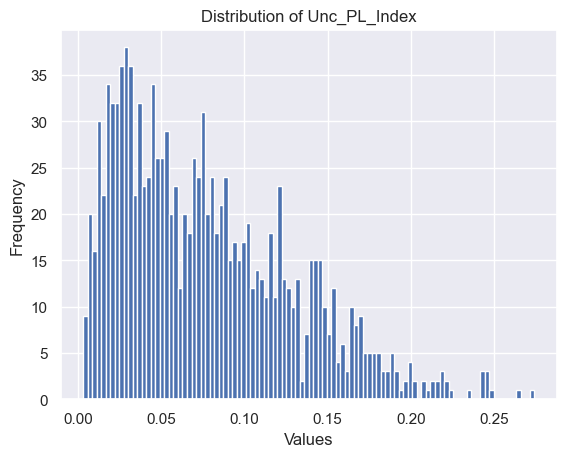

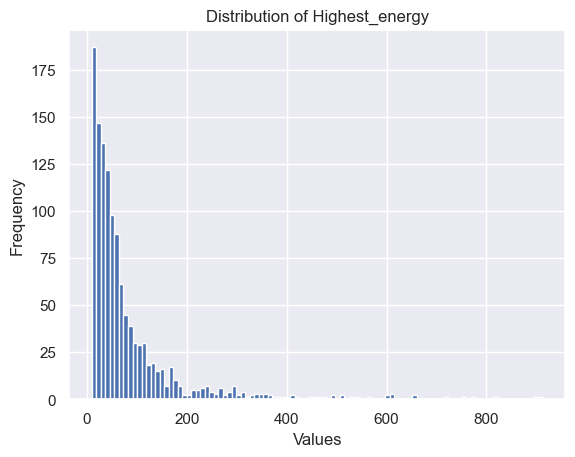

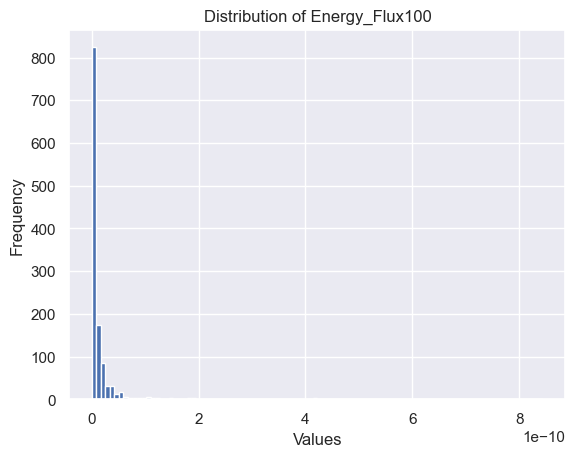

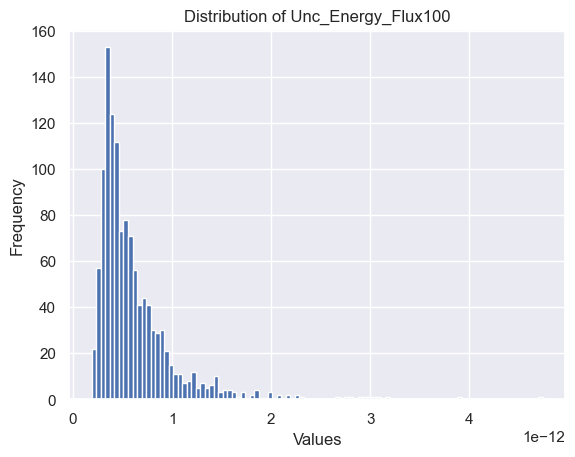

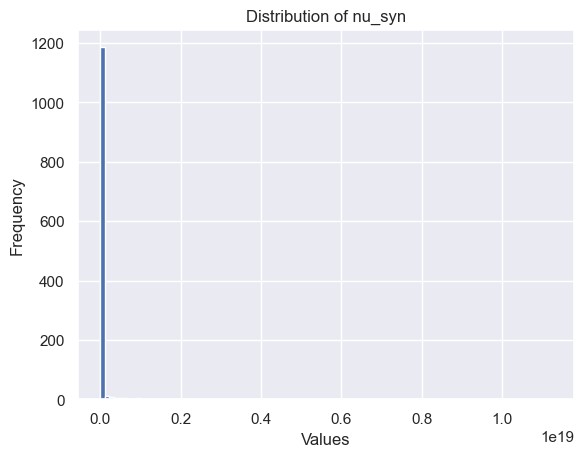

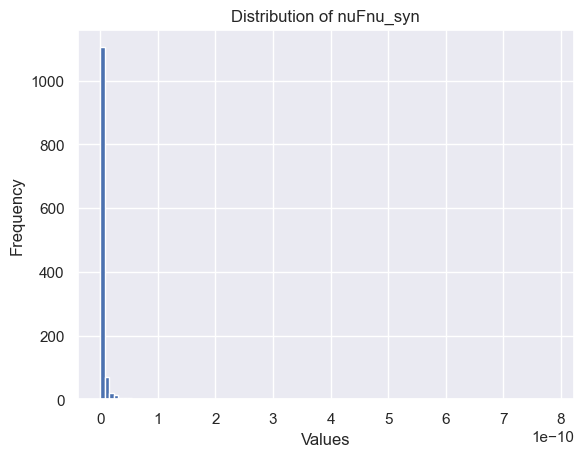

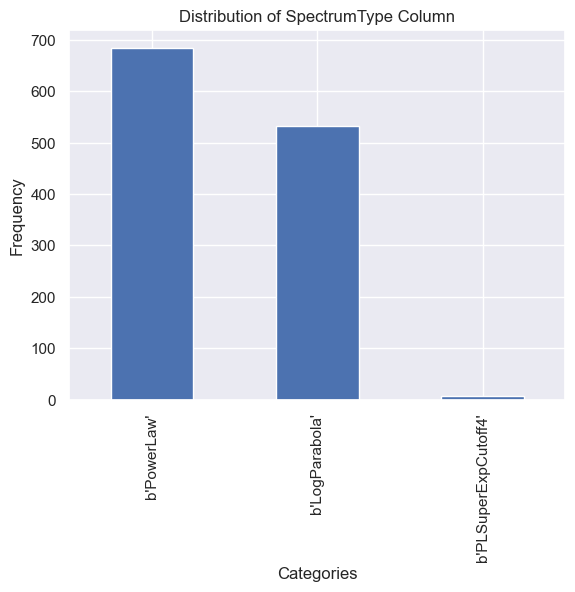

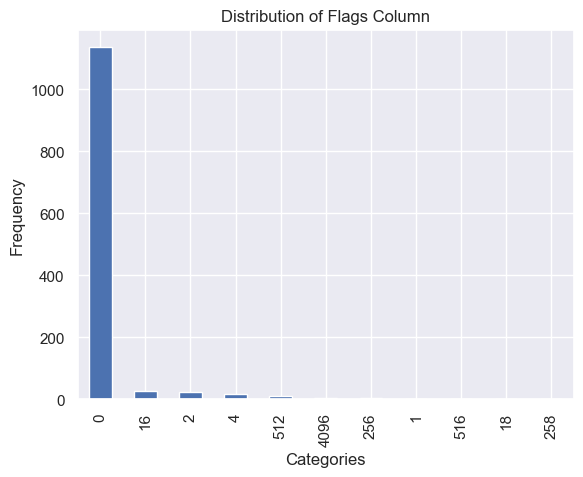

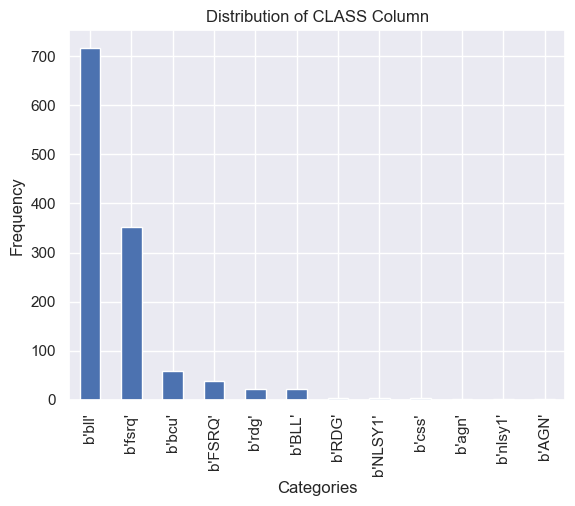

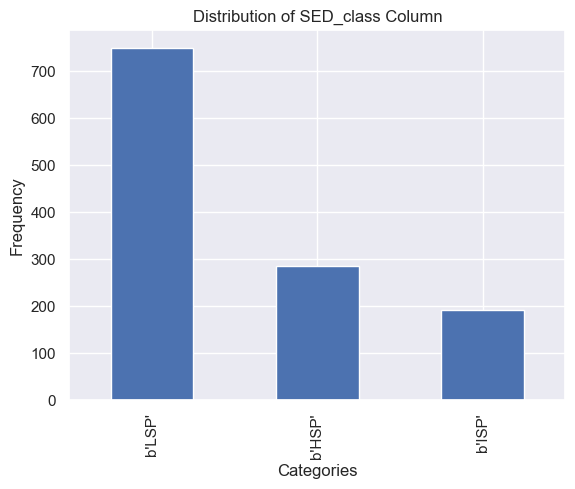

In [22]:
for column in numeric_features:
    plot_column_distribution(column = column, df = df)
for column in categorical_features:
    plot_categorical_column_dsitribution(column=column, df=df)

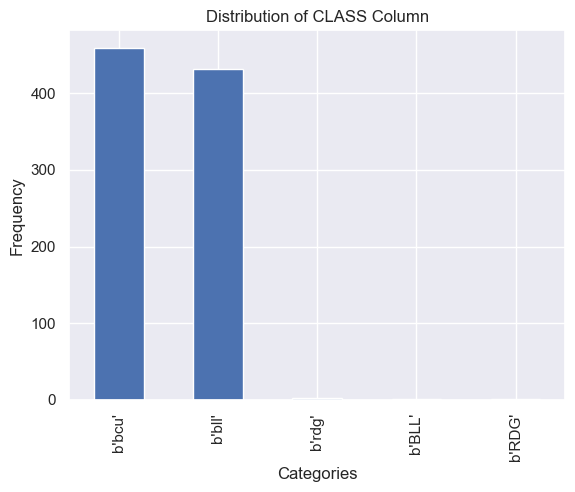

In [23]:
plot_categorical_column_dsitribution(column = 'CLASS', df = unknown_df)

As we can see, this feature is incredibly skewed and log transformations will help solve that - after careful analysis, we have chosen a select number of features to transform

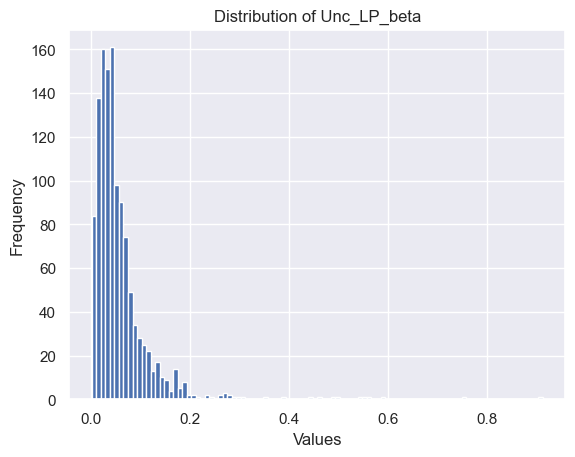

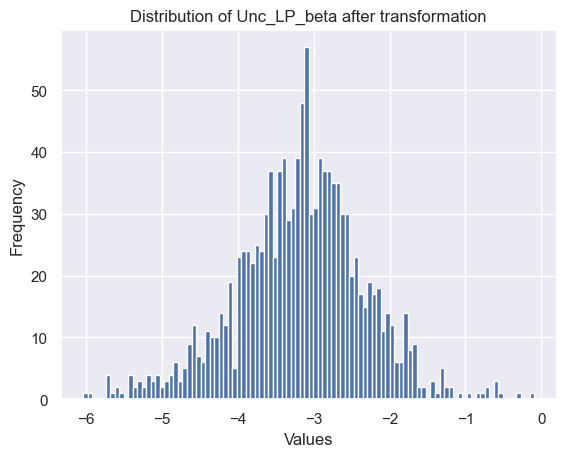

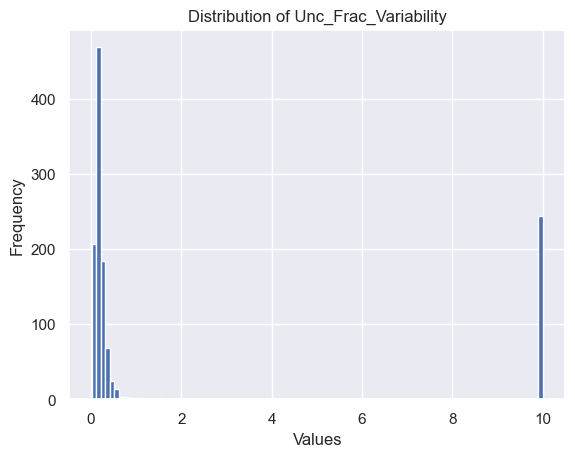

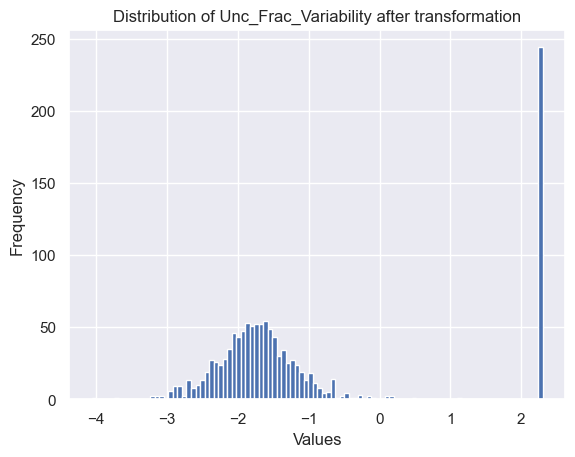

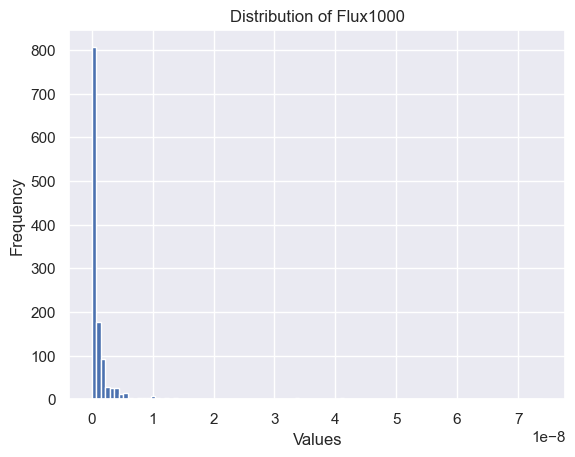

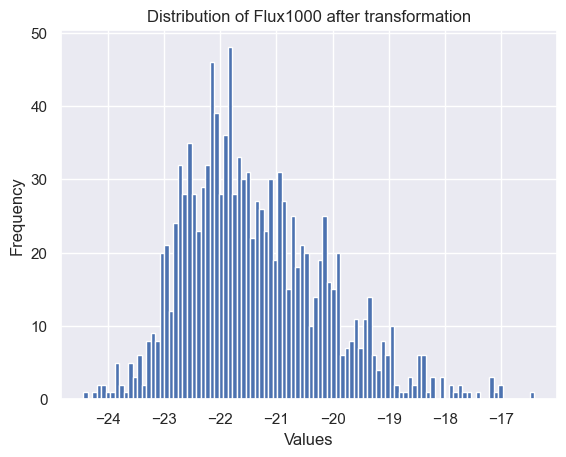

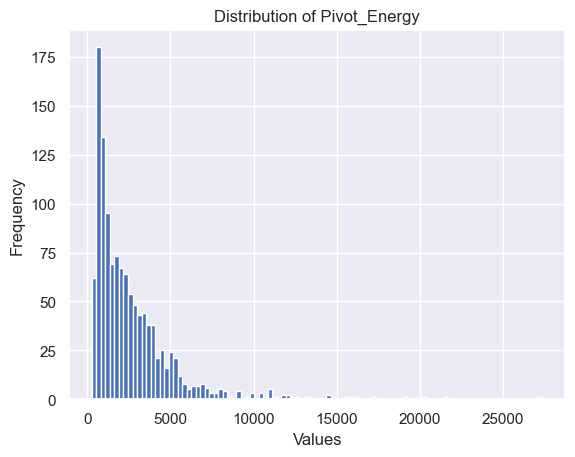

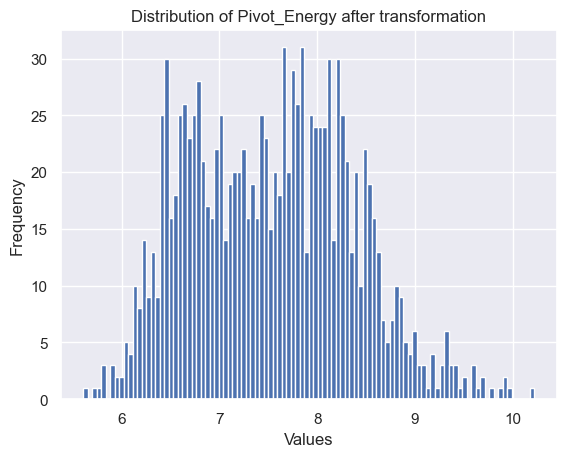

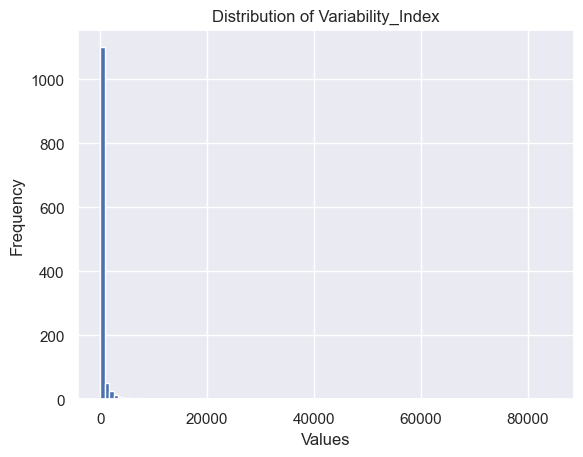

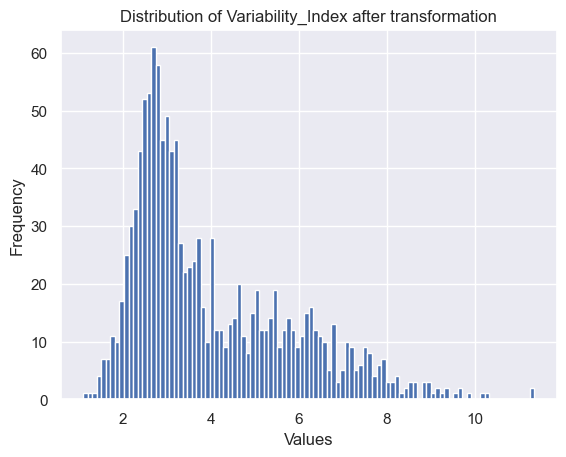

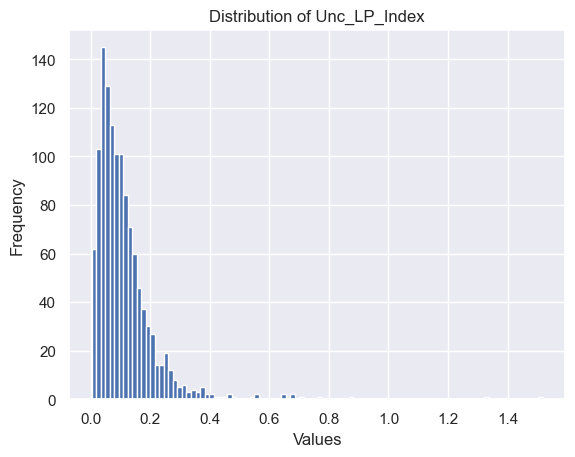

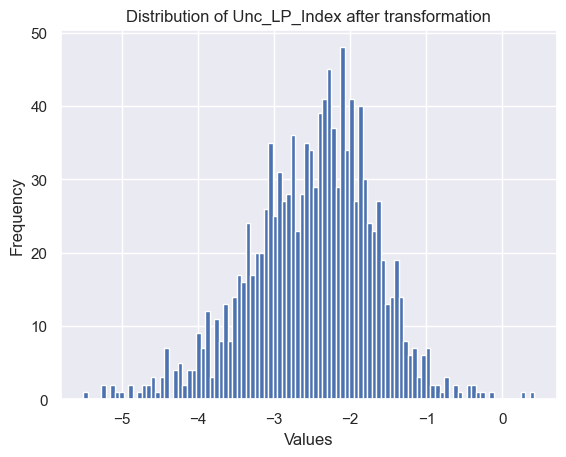

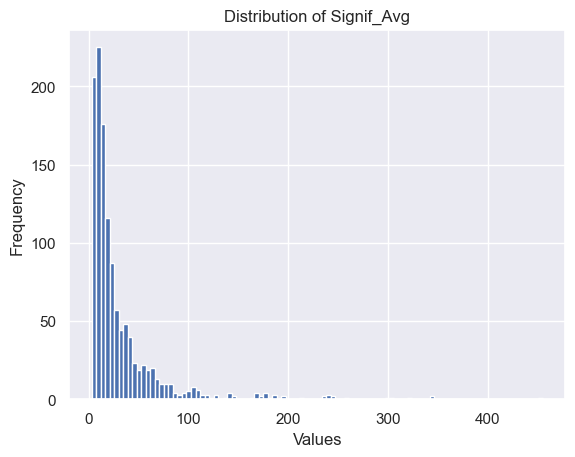

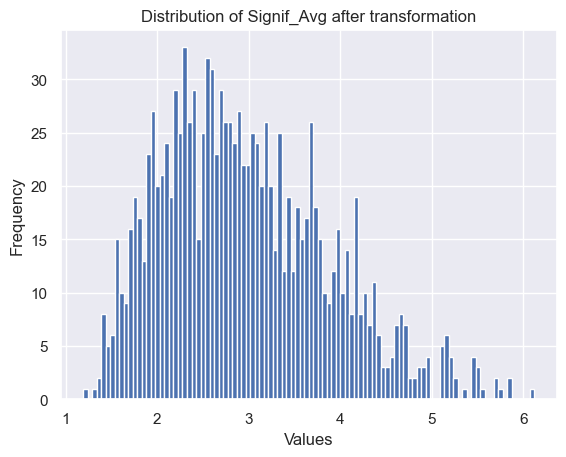

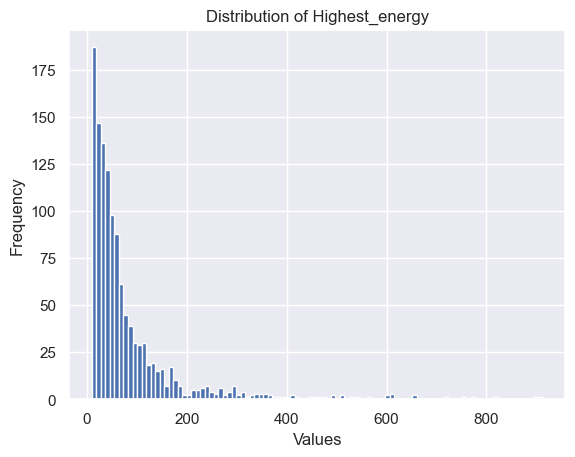

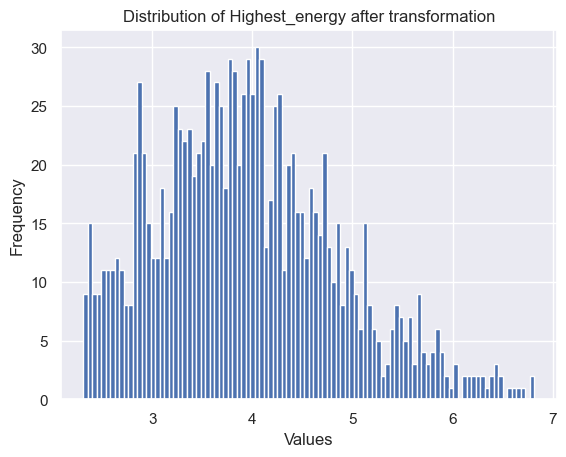

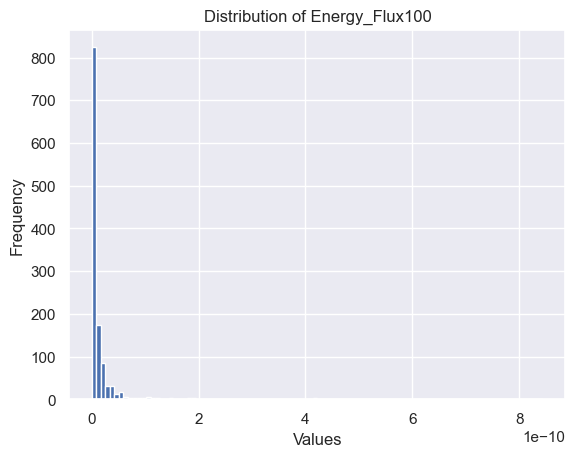

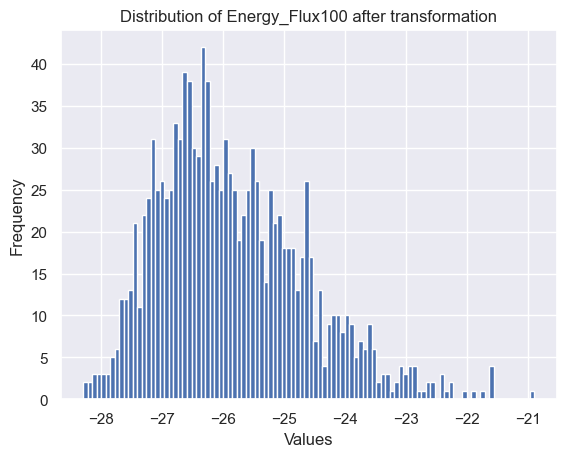

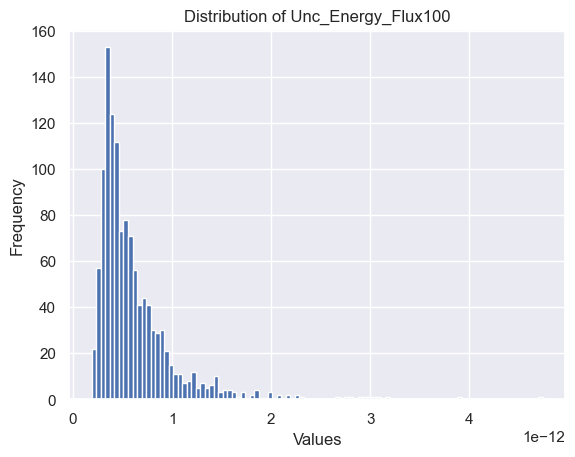

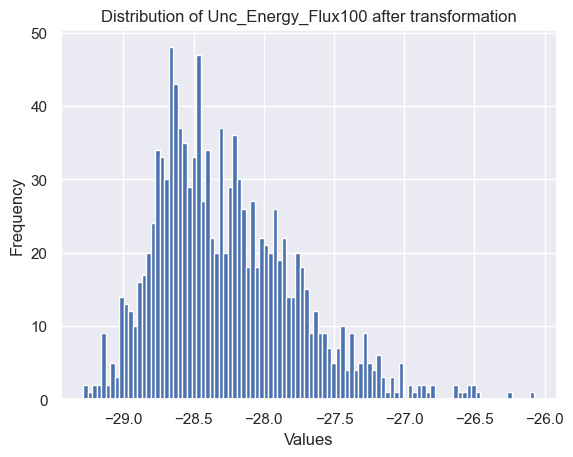

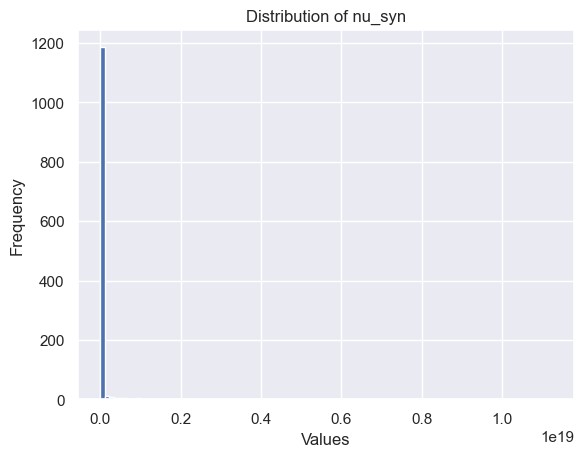

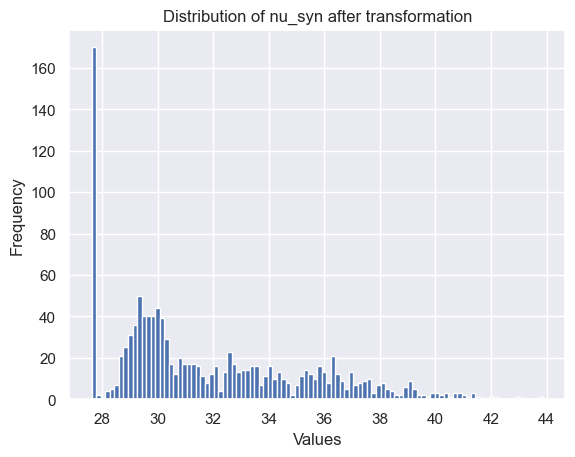

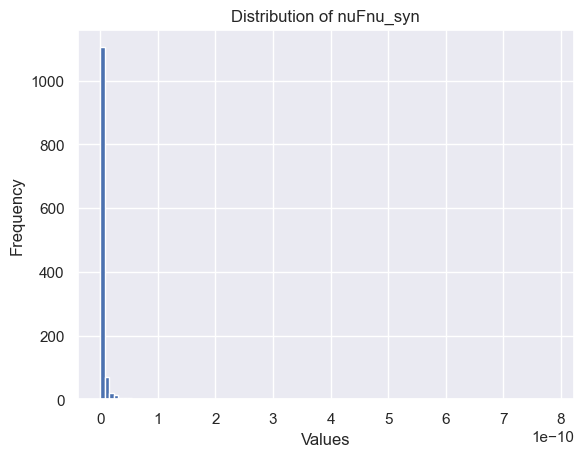

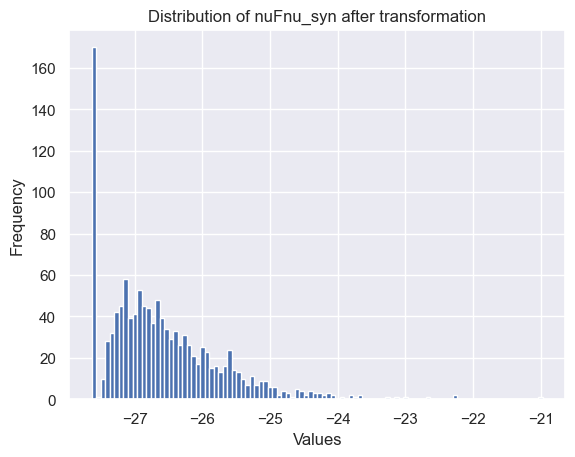

In [24]:
for column in numeric_features:
    if not(column in ["Frac_Variability", "GLAT", "GLON","LP_Index", "LP_beta", "PL_Index", "Unc_Flux1000","Unc_PL_Index"]):
        if column == 'nuFnu_syn':
            plot_column_distribution(column = column, df = df, transformed=False)
            df[column] = np.log(df[column]+ 1e-12)
            unknown_df[column] = np.log(unknown_df[column]+1e-12)
            plot_column_distribution(column = column, df = df, transformed=True)
        elif column == 'nu_syn':
            plot_column_distribution(column = column, df = df, transformed=False)
            df[column] = np.log(df[column] + 1e12)
            unknown_df[column] = np.log(unknown_df[column] + 1e12)
            plot_column_distribution(column = column, df = df, transformed=True)
        else: 
            plot_column_distribution(column = column, df = df, transformed=False)
            df[column] = np.log(df[column])
            unknown_df[column] = np.log(unknown_df[column])
            plot_column_distribution(column = column, df = df, transformed=True)


Handling types for categorical features

In [25]:
print(df['SED_class'].unique())
print(df['SpectrumType'].unique())
print(df['CLASS'].unique())

[b'LSP' b'ISP' b'HSP']
[b'PowerLaw' b'LogParabola' b'PLSuperExpCutoff4']
[b'bll' b'fsrq' b'rdg' b'agn' b'bcu' b'FSRQ' b'BLL' b'RDG' b'nlsy1' b'AGN'
 b'NLSY1' b'css']


In [26]:
df['SpectrumType'] = df['SpectrumType'].str.decode('utf-8')
df['SED_class'] = df['SED_class'].str.decode('utf-8')
print(df['SED_class'].unique())
print(df['SpectrumType'].unique())

['LSP' 'ISP' 'HSP']
['PowerLaw' 'LogParabola' 'PLSuperExpCutoff4']


In [27]:
unknown_df['SpectrumType'] = unknown_df['SpectrumType'].str.decode('utf-8')
unknown_df['SED_class'] = unknown_df['SED_class'].str.decode('utf-8')
print(unknown_df['SED_class'].unique())
print(unknown_df['SpectrumType'].unique())

['ISP' 'LSP' 'HSP']
['PowerLaw' 'LogParabola']


Many instances in the 'CLASS' feature contain both upper and lower case variants for the same class - those have been handled here:

In [28]:
df['CLASS'] = df['CLASS'].str.decode('utf-8')
df['CLASS'] = df['CLASS'].str.upper()

unknown_df['CLASS'] = unknown_df['CLASS'].str.decode('utf-8')
unknown_df['CLASS'] = unknown_df['CLASS'].str.upper()

# Mapping dictionary for combining class values
class_mapping = {
    'BLL': 'BLL',
    'FSRQ': 'FSRQ',
    'RDG': 'RDG',
    'AGN': 'AGN',
    'NLSY1': 'NLSY1'
}

# Replace class values using mapping dictionary
df['CLASS'] = df['CLASS'].replace(class_mapping)
unknown_df['CLASS'] = unknown_df['CLASS'].replace(class_mapping)

In [29]:
df['CLASS'].unique()

array(['BLL', 'FSRQ', 'RDG', 'AGN', 'BCU', 'NLSY1', 'CSS'], dtype=object)

In [30]:
unknown_df['CLASS'].unique()

array(['BCU', 'BLL', 'RDG'], dtype=object)

In [31]:
df.to_csv('./known_redshift_samples.csv', index=False)

Seperating features and labels, and define relevant transformations for them

In [32]:
features = df.drop(['Redshift'], axis=1)
labels = df['Redshift']

Sanity check for features

In [33]:
features.columns

Index(['nuFnu_syn', 'nu_syn', 'CLASS', 'SED_class', 'GLON', 'LP_beta', 'GLAT',
       'Frac_Variability', 'Pivot_Energy', 'Highest_energy', 'PL_Index',
       'SpectrumType', 'Unc_Frac_Variability', 'LP_Index',
       'Unc_Energy_Flux100', 'Unc_Flux1000', 'Variability_Index', 'Flux1000',
       'Unc_LP_Index', 'Energy_Flux100', 'Signif_Avg', 'Unc_PL_Index',
       'Unc_LP_beta', 'Flags'],
      dtype='object')

Defining final feature transformations - standard scaling for numeric and encoding for categorical

In [34]:
transformer = make_column_transformer(
    (StandardScaler(), 
        numeric_features),
    (OrdinalEncoder(), 
        categorical_features)
)

Splitting the data frame into train val and test sets

In [35]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.10, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=42)

In [37]:
X_train.to_csv('./train_samples.csv', index=False)
X_val.to_csv('./val_samples.csv', index = False)
X_test.to_csv('./test_samples.csv', index = False)

In [45]:
y_train

1212    0.247
1503    0.879
1780    0.227
2305    1.191
881     2.001
        ...  
2865    0.630
3075    0.211
3166    1.404
2273    0.910
3151    0.505
Name: Redshift, Length: 1101, dtype: float32

In [38]:
X_train

,nuFnu_syn,nu_syn,CLASS,SED_class,GLON,LP_beta,GLAT,Frac_Variability,Pivot_Energy,Highest_energy,...,Unc_Energy_Flux100,Unc_Flux1000,Variability_Index,Flux1000,Unc_LP_Index,Energy_Flux100,Signif_Avg,Unc_PL_Index,Unc_LP_beta,Flags
1212,-26.043222,34.068348,BLL,ISP,230.889984,0.177678,17.523933,0.341905,8.212458,4.486777,...,-28.254305,4.546134e-11,3.155362,-21.716518,-2.002359,-26.307783,2.808019,0.070642,-2.613619,0
1503,-27.106356,29.987141,BCU,LSP,134.677505,0.092087,39.210743,0.883445,7.400763,4.447827,...,-27.898714,4.772145e-11,5.445960,-20.980656,-2.884295,-25.497974,3.132139,0.040438,-3.411789,0
1780,-26.430635,36.381004,BLL,HSP,292.914215,0.036806,22.509947,0.384905,8.410208,5.148749,...,-28.303988,4.291960e-11,3.181541,-21.596344,-2.516148,-26.013674,2.852129,0.066110,-3.315617,2
2305,-26.394274,29.726400,FSRQ,LSP,353.900909,0.120646,42.952923,0.293430,6.654824,4.052157,...,-27.610287,7.880591e-11,4.293838,-20.334677,-2.920548,-24.859495,3.348850,0.034982,-3.421046,0
881,-26.027199,29.339138,FSRQ,LSP,265.923248,0.009151,-30.703491,0.151229,7.586806,3.602676,...,-28.713196,2.786681e-11,2.716519,-22.478292,-2.026083,-26.931610,2.020651,0.120427,-2.811493,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2865,-25.909708,29.214643,FSRQ,LSP,1.576304,0.165393,-28.961407,0.360526,6.482987,2.913117,...,-27.722088,9.305243e-11,5.715351,-19.581566,-3.421426,-24.234451,4.150571,0.018426,-3.925699,0
3075,-25.233007,31.418657,FSRQ,LSP,72.112946,0.046383,-26.081432,0.452936,6.080454,5.206892,...,-27.548479,9.944534e-11,7.097329,-19.299263,-4.064224,-23.580080,4.496208,0.013998,-4.609774,0
3166,-24.992903,29.945545,FSRQ,LSP,58.942257,0.079434,-48.832916,0.858108,6.422362,3.103945,...,-27.986937,5.881282e-11,5.578192,-20.768646,-2.843075,-25.215504,3.344051,0.039892,-3.450573,0
2273,-26.035252,33.582355,CSS,ISP,109.993217,0.051520,42.101910,1.141495,6.711291,2.839488,...,-28.870775,2.395147e-11,5.451443,-22.089249,-2.539630,-26.324003,2.788854,0.063800,-3.048169,0


In [39]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(1101, 24)
(61, 24)
(62, 24)
(1101,)
(61,)
(62,)


Removing rows in 'unknown_df' that have categorical values absent in X_train

In [40]:
for cat_feature in categorical_features:
    unknown_unique_values = unknown_df[cat_feature].unique()
    train_unique_values = X_train[cat_feature].unique()
    unknown_df = unknown_df[unknown_df[cat_feature].isin(train_unique_values)]

In [41]:
unknown_df.shape

(892, 24)

Sanity check to confirm that we arent excluding any categories in our training data

In [42]:
for cat_feature in categorical_features:
    print(X_train[cat_feature].unique())

for cat_feature in categorical_features:
    print(X_test[cat_feature].unique())

for cat_feature in categorical_features:
    print(X_val[cat_feature].unique())

for cat_feature in categorical_features:
    print(unknown_df[cat_feature].unique())


['LogParabola' 'PowerLaw' 'PLSuperExpCutoff4']
[   0    2 4096    4   16  516    1  512  256  258   18]
['BLL' 'BCU' 'FSRQ' 'RDG' 'AGN' 'NLSY1' 'CSS']
['ISP' 'LSP' 'HSP']
['LogParabola' 'PowerLaw']
[ 0  2 16  4]
['BLL' 'FSRQ' 'BCU' 'RDG']
['HSP' 'LSP' 'ISP']
['PowerLaw' 'LogParabola']
[  0  16   2 256]
['BLL' 'FSRQ' 'RDG']
['LSP' 'ISP' 'HSP']
['PowerLaw' 'LogParabola']
[   0    2  512    4  256 4096   16    1]
['BCU' 'BLL' 'RDG']
['ISP' 'LSP' 'HSP']


Feature transformations

In [43]:
transformer.fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)
X_val = transformer.transform(X_val)
unknown_redshift_data = transformer.transform(unknown_df)

In [44]:
X_train[0, :]

array([ 0.63265437,  0.67030227, -1.32246959,  1.06788957, -0.53712302,
       -1.57622766, -0.26498055, -0.17577431,  0.8292312 , -0.47049105,
       -0.2763831 ,  0.60733968,  0.2259215 , -0.16670364, -0.11491159,
        0.6060378 , -0.37173349,  0.02327194,  0.63682169,  0.63167155,
        0.        ,  0.        ,  2.        ,  1.        ])

Saving the data to ensure reproducibility of results

In [37]:
np.save('./X_train.npy', X_train)
np.save('./X_val.npy', X_val)
np.save('./X_test.npy', X_test)
np.save('./y_train.npy', y_train)
np.save('./y_val.npy', y_val)
np.save('./y_test.npy', y_test)
np.save('./unknown_redshift_data.npy', unknown_redshift_data)

In [40]:
unknown_df.to_csv('./unknown_redshift_samples.csv', index=False)